<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

In 2016, the College Board made significant changes to SAT test format and the College Board have also partnered with Khan Academy to provide free, world-class test prep for students around the world. Such changes were made in order to increase the participation rate of SAT. This project aims to explore the trends in SAT participation for the year of 2017-2019 and to further understand how to increase participation rate in states with low participation rate.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT is standardized test that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). SAT have score scale of 1600, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Therefore, significant changes were made to SAT test format in 2016, which you can read more about it on an article CNN reported ([*source*](https://edition.cnn.com/2014/03/05/living/sat-test-changes-schools/)).

### Data Sources

The participation rates and mean aggregate scores of SAT across all states in 2017, 2018 and 2019.

* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State

sat_2017, sat_2018 and sat_2019 contains participation rates across 50 states. The data set also contains the mean score for 'Evidence-Based Reading and Writing' (EBRW), 'Math' and 'Total' (which is the sum of EBRW and Math).

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
#In order to get mean:
#Firstly I get the sum of all my values by using sum()
#Then I get the number of values by using len()
# To get mean, I use sum / len
def mean(ls):
    return sum(ls) / len(ls)

#Testing out my function
mean([1,2,3])

2.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
#In order to get standard deviation:
def std_dev(ls):
    n = len(ls)                            #n is the number of values in ls
    dev = [(x-mean(ls)) ** 2 for x in ls]  #I got all the square deviations by using the value to subtract the mean(using the function above)
    var = sum(dev) / n                     #I got the variance by dividing sqaure deviations by n
    std_dev = var ** 0.5                   #I got standard deviation by square root of variance
    return std_dev

#Testing out my function and rounding it to 4 decimal place
round(std_dev([1,2,3]),4)

0.8165

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
# Converting a list of string to a list of float:
#Firstly I remove the '%' symbol by using .replace()
#Then I divide by 100 for percentage
#Then I use float() to convert string to float
def string_to_float(x):
    ls = float(x.replace('%',''))/100
    return ls

#Testing out my function
string_to_float('50%')

0.5

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

In [4]:
#Import pandas, numpy, matplotlib.pyplot and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

In [5]:
#Importing the datasets that I am using for this project which is 'sat_2017', 'sat_2018' and 'sat_2019'.
sat_2017 = pd.read_csv('sat_2017.csv')
sat_2018 = pd.read_csv('sat_2018.csv')
sat_2019 = pd.read_csv('sat_2019.csv')

In [6]:
#Displaying the first 5 rows of sat_2017 using .head() as by default it is the top 5 row for sat_2017
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [7]:
#Repeating for sat_2018
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [8]:
#Repeating for sat_2019
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [9]:
#Using .describe() to see descriptive statistics
#Using .round to round the number to 2 decimal place
sat_2017.describe().round(2)

,Evidence-Based Reading and Writing,Math,Total
count,51.00,51.00,51.00
mean,569.12,547.63,1126.10
std,45.67,84.91,92.49
min,482.00,52.00,950.00
25%,533.50,522.00,1055.50
50%,559.00,548.00,1107.00
75%,613.00,599.00,1212.00
max,644.00,651.00,1295.00


In [10]:
#Repeating for 2018
#Using .describe() to see descriptive statistics
#Using .round to round the number to 2 decimal place
sat_2018.describe().round(2)

,Evidence-Based Reading and Writing,Math,Total
count,51.00,51.00,51.00
mean,563.69,556.24,1120.02
std,47.50,47.77,94.16
min,480.00,480.00,977.00
25%,534.50,522.50,1057.50
50%,552.00,544.00,1098.00
75%,610.50,593.50,1204.00
max,643.00,655.00,1298.00


In [11]:
#Repeating for 2019
#Using .describe() to see descriptive statistics
#Using .round to round the number to 2 decimal place
sat_2019.describe().round(2)

,EBRW,Math,Total
count,53.00,53.00,53.00
mean,558.00,548.47,1106.53
std,47.55,53.79,100.99
min,483.00,445.00,935.00
25%,518.00,506.00,1024.00
50%,550.00,545.00,1097.00
75%,610.00,596.00,1200.00
max,636.00,648.00,1284.00


In the project, we will analyse the data for SAT in year 2017, 2018 and 2019. We have the participation rate, mean scores of 'Evidence-Based Reading and Writing', 'Math' and 'Total'(which is the sum of 'Evidence-Based Reading and Writing' and 'Math') for each state.

Using the .describe() function to generate descriptive statistics like count, mean, standard deviation, minimum, maximum, 25%, 50% and 75%. I have rounded the values to 2 decimal places for a cleaner look.

In [12]:
#Checking for missing values using isnull(). 
#I also use .sum() to sum up the number of missing values in each columns.
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [13]:
#Repeating for sat_2018
sat_2018.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [14]:
#Repeating for sat_2018
sat_2019.isnull().sum()

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

In [15]:
#Checking the min and max values for each subject for the year 2017
sat_2017_min_and_max = sat_2017[['Evidence-Based Reading and Writing','Math']].agg(['min','max'])
sat_2017_min_and_max                                                                                  

,Evidence-Based Reading and Writing,Math
min,482,52
max,644,651


In [16]:
#Checking the min and max values for each subject for the year 2018    
sat_2018_min_and_max = sat_2018[['Evidence-Based Reading and Writing','Math']].agg(['min','max'])
sat_2018_min_and_max

,Evidence-Based Reading and Writing,Math
min,480,480
max,643,655


In [17]:
#Checking the min and max values for each subject for the year 2019    
sat_2019_min_and_max = sat_2019[['EBRW','Math']].agg(['min','max'])
sat_2019_min_and_max

,EBRW,Math
min,483,445
max,636,648


In [18]:
#Checking the data types of each column in sat_2017
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [19]:
#Checking the data types of each column in sat_2018
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [20]:
#Checking the data types of each column in sat_2019
sat_2019.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

In [21]:
#The percentage column values type is object. 
#Hence I am using the string_to_float function I created above to convert the values from object to float.
sat_2017['Participation Percent'] = sat_2017['Participation'].map(string_to_float)

#I am checking whether is my 'Participation Percent' correct by comparing it to my 'Participation'.
sat_2017[['Participation','Participation Percent']].head()

,Participation,Participation Percent
0,5%,0.05
1,38%,0.38
2,30%,0.30
3,3%,0.03
4,53%,0.53


In [22]:
#Repeating for sat_2018
#The percentage column values type is object. 
#Hence I am using the string_to_float function I created above to convert the values from object to float.
sat_2018['Participation Percent'] = sat_2018['Participation'].map(string_to_float)

#I am checking whether is my 'Participation Percent' correct by comparing it to my 'Participation'.
sat_2018[['Participation','Participation Percent']].head()

,Participation,Participation Percent
0,6%,0.06
1,43%,0.43
2,29%,0.29
3,5%,0.05
4,60%,0.60


In [23]:
#For sat_2019['Participation Rate'] there is 2 rows with '__'
#It was not recognise in isnull as it is filled
#I am dropping the rows since these 2 states are not in sat_2017 and sat_2018 and therefore not useful
sat_2019.drop([39,47], axis=0, inplace=True)

#Checking to see if the correct rows were dropped
sat_2019

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065
5,Colorado,100%,518,506,1024
6,Connecticut,100%,529,516,1046
7,Delaware,100%,499,486,985
8,District of Columbia,94%,495,480,975
9,Florida,100%,516,483,999


In [24]:
#Resetting the index
sat_2019.reset_index(inplace = True)

In [25]:
# Dropping the old index
sat_2019.drop(['index'], axis=1, inplace=True)

#Checking to see if the correct column (old index) was dropped
sat_2019

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065
5,Colorado,100%,518,506,1024
6,Connecticut,100%,529,516,1046
7,Delaware,100%,499,486,985
8,District of Columbia,94%,495,480,975
9,Florida,100%,516,483,999


In [26]:
#Repeating for sat_2019
#The percentage column values type is object. 
#Hence I am using the string_to_float function I created above to convert the values from object to float.
sat_2019['Participation Percent'] = sat_2019['Participation Rate'].map(string_to_float)

#I am checking whether is my 'Participation Percent' correct by comparing it to my 'Participation Rate'.
sat_2019[['Participation Rate','Participation Percent']].head()

,Participation Rate,Participation Percent
0,7%,0.07
1,41%,0.41
2,31%,0.31
3,6%,0.06
4,63%,0.63


In [27]:
#Renaming each column and adding the year to each column except 'State'
#Only changing 'State' to lowercase so that I can use 'state' to merge my files together later
sat_2017.rename(columns = {'State':'state',
                           'Participation':'participation_17', 
                           'Evidence-Based Reading and Writing':'ebrw_17',
                           'Math' : 'math_17',
                           'Total':'total_17', 
                           'Participation Percent': 'participation_rate_17'}, inplace = True)

#Checking that each column is renamed correctly
sat_2017.head()

,state,participation_17,ebrw_17,math_17,total_17,participation_rate_17
0,Alabama,5%,593,572,1165,0.05
1,Alaska,38%,547,533,1080,0.38
2,Arizona,30%,563,553,1116,0.30
3,Arkansas,3%,614,594,1208,0.03
4,California,53%,531,524,1055,0.53


In [28]:
#Renaming each column and adding the year to each column except 'State'
#Only changing 'State' to lowercase so that I can use 'state' to merge my files together later
sat_2018.rename(columns = {'State':'state',
                           'Participation':'participation_18', 
                           'Evidence-Based Reading and Writing':'ebrw_18',
                           'Math' : 'math_18',
                           'Total':'total_18', 
                           'Participation Percent': 'participation_rate_18'}, inplace = True)

#Checking that each column is renamed correctly
sat_2018.head()

,state,participation_18,ebrw_18,math_18,total_18,participation_rate_18
0,Alabama,6%,595,571,1166,0.06
1,Alaska,43%,562,544,1106,0.43
2,Arizona,29%,577,572,1149,0.29
3,Arkansas,5%,592,576,1169,0.05
4,California,60%,540,536,1076,0.60


In [29]:
#Renaming each column and adding the year to each column except 'State'
#Only changing 'State' to lowercase so that I can use 'state' to merge my files together later
sat_2019.rename(columns = {'State':'state',
                           'Participation Rate':'participation_19', 
                           'EBRW':'ebrw_19',
                           'Math' : 'math_19',
                           'Total':'total_19', 
                           'Participation Percent': 'participation_rate_19'}, inplace = True)

#Checking that each column is renamed correctly
sat_2019.head()

,state,participation_19,ebrw_19,math_19,total_19,participation_rate_19
0,Alabama,7%,583,560,1143,0.07
1,Alaska,41%,556,541,1097,0.41
2,Arizona,31%,569,565,1134,0.31
3,Arkansas,6%,582,559,1141,0.06
4,California,63%,534,531,1065,0.63


In [30]:
#Merging 'sat_2017' and 'sat_2018' using the column 'state'
sat_2017_and_sat_2018 = pd.merge(left = sat_2017, 
                                 right = sat_2018, 
                                 how = 'left', 
                                 on = 'state')

#Checking that it is merged correctly
sat_2017_and_sat_2018.head()

,state,participation_17,ebrw_17,math_17,total_17,participation_rate_17,participation_18,ebrw_18,math_18,total_18,participation_rate_18
0,Alabama,5%,593,572,1165,0.05,6%,595,571,1166,0.06
1,Alaska,38%,547,533,1080,0.38,43%,562,544,1106,0.43
2,Arizona,30%,563,553,1116,0.30,29%,577,572,1149,0.29
3,Arkansas,3%,614,594,1208,0.03,5%,592,576,1169,0.05
4,California,53%,531,524,1055,0.53,60%,540,536,1076,0.60


In [31]:
#Merging 'sat_2017_and_sat_2018' and 'sat_2019' using the column 'state'
sat_2017_to_sat_2019 = pd.merge(left = sat_2017_and_sat_2018, 
                                right = sat_2019, 
                                how = 'left', 
                                on = 'state')

#Checking that it is merged correctly
sat_2017_to_sat_2019.head()

,state,participation_17,ebrw_17,math_17,total_17,participation_rate_17,participation_18,ebrw_18,math_18,total_18,participation_rate_18,participation_19,ebrw_19,math_19,total_19,participation_rate_19
0,Alabama,5%,593,572,1165,0.05,6%,595,571,1166,0.06,7%,583,560,1143,0.07
1,Alaska,38%,547,533,1080,0.38,43%,562,544,1106,0.43,41%,556,541,1097,0.41
2,Arizona,30%,563,553,1116,0.30,29%,577,572,1149,0.29,31%,569,565,1134,0.31
3,Arkansas,3%,614,594,1208,0.03,5%,592,576,1169,0.05,6%,582,559,1141,0.06
4,California,53%,531,524,1055,0.53,60%,540,536,1076,0.60,63%,534,531,1065,0.63


In [32]:
#Saved 'sat_2017_to_sat_2019' into a new CSV file
sat_2017_to_sat_2019.to_csv('sat_2017_to_sat_2019.csv', index = False)

### Data Dictionary

| **Column**               | **Type**  | **Dataset**           | **Description**                                                                         |
|---------------------------|-----------|-----------------------|-----------------------------------------------------------------------------------------|
| **state**                 | _object_  | sat _2017_to_sat_2019 | The states in the United States of America.                                             |
| **participation_17**      | _object_  | sat_2017_to_sat_2019  | The participation rate of each state for SAT in 2017 (datatype: string).                |
| **ebrw_17**               | _integer_ | sat_2017_to_sat_2019  | The mean score for the subject 'Evidence-Based Reading and Writing' for SAT in 2017. |
| **math_17**               | _integer_ | sat_2017_to_sat_2019  | The mean score for the subject 'Math' for SAT in 2017.                               |
| **total_17**              | _integer_ | sat_2017_to_sat_2019  | The mean total score for SAT in 2017.                                                |
| **participation_rate_17** | _float_   | sat_2017_to_sat_2019  | The participation rate of each state for SAT in 2017 (datatype: float).                 |
| **participation_18**      | _object_  | sat_2017_to_sat_2019  | The participation rate of each state for SAT in 2018 (datatype: string).                |
| **ebrw_18**               | _integer_ | sat_2017_to_sat_2019  | The mean score for the subject 'Evidence-Based Reading and Writing' for SAT in 2018. |
| **math_18**               | _integer_ | sat_2017_to_sat_2019  | The mean score for the subject 'Math' for SAT in 2018.                               |
| **total_18**              | _integer_ | sat_2017_to_sat_2019  | The mean total score for SAT in 2018.                                                |
| **participation_rate_18** | _float_   | sat_2017_to_sat_2019  | The participation rate of each state for SAT in 2018 (datatype: float).                 |
| **participation_19**      | _object_  | sat_2017_to_sat_2019  | The participation rate of each state for SAT in 2019 (datatype: string).                |
| **ebrw_19**               | _integer_ | sat_2017_to_sat_2019  | The mean score for the subject 'Evidence-Based Reading and Writing' for SAT in 2019. |
| **math_19**               | _integer_ | sat_2017_to_sat_2019  | The mean score for the subject 'Math' for SAT in 2019.                               |
| **total_19**              | _integer_ | sat_2017_to_sat_2019  | The mean total score for SAT in 2019.                                                |
| **participation_rate_19** | _float_   | sat_2017_to_sat_2019  | The participation rate of each state for SAT in 2019 (datatype: float).                 |

## Exploratory Data Analysis

### Summary Statistics

In [33]:
#Using .descrtibe() to get summary statistics
round(sat_2017_to_sat_2019.describe().T, 2) 

,count,mean,std,min,25%,50%,75%,max
ebrw_17,51.0,569.12,45.67,482.00,533.50,559.00,613.00,644.0
math_17,51.0,547.63,84.91,52.00,522.00,548.00,599.00,651.0
total_17,51.0,1126.10,92.49,950.00,1055.50,1107.00,1212.00,1295.0
participation_rate_17,51.0,0.40,0.35,0.02,0.04,0.38,0.66,1.0
ebrw_18,51.0,563.69,47.50,480.00,534.50,552.00,610.50,643.0
math_18,51.0,556.24,47.77,480.00,522.50,544.00,593.50,655.0
total_18,51.0,1120.02,94.16,977.00,1057.50,1098.00,1204.00,1298.0
participation_rate_18,51.0,0.46,0.37,0.02,0.04,0.52,0.78,1.0
ebrw_19,51.0,560.80,46.25,483.00,527.50,550.00,612.00,636.0
math_19,51.0,552.20,51.29,460.00,511.50,546.00,599.00,648.0


In [34]:
#Using dictionary comprehension to apply my std_dev function to derive the standard deviation
#Apply std_dev to columns where the data type is 'float64' or 'int64'

sd = {col.name:std_dev(col) 
      for col in [sat_2017_to_sat_2019[i] 
                  for i in sat_2017_to_sat_2019.columns 
                  if (sat_2017_to_sat_2019[i].dtype=='float64') or (sat_2017_to_sat_2019[i].dtype=='int64')]}
sd

{'ebrw_17': 45.21697020437866,
 'math_17': 84.07255521608297,
 'total_17': 91.58351056778743,
 'participation_rate_17': 0.3492907076664507,
 'ebrw_18': 47.03460978357609,
 'math_18': 47.30194550378352,
 'total_18': 93.22742384464433,
 'participation_rate_18': 0.3694661922353942,
 'ebrw_19': 45.792378682545134,
 'math_19': 50.78521461840036,
 'total_19': 96.24027185617864,
 'participation_rate_19': 0.3836584048685726}

In [35]:
#Which states have the highest and lowest participation rates for the 2017, 2018, or 2019 SAT 

#Using sort_values to sort participation rate by state in 2017
#.head() shows the top 5 which is the lowest particpation rate
sat_2017_to_sat_2019.sort_values('participation_rate_17')[['state','participation_rate_17']].head()

,state,participation_rate_17
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


In [36]:
#Using sort_values to sort participation rate by state in 2017
#.tail() shows the bottom 5 which is the highest particpation rate
sat_2017_to_sat_2019.sort_values('participation_rate_17')[['state','participation_rate_17']].tail()

,state,participation_rate_17
29,New Hampshire,0.96
22,Michigan,1.00
8,District of Columbia,1.00
7,Delaware,1.00
6,Connecticut,1.00


In [37]:
#Repeating for 2018
#Using sort_values to sort participation rate by state in 2018
#.head() shows the top 5 which is the lowest particpation rate
sat_2017_to_sat_2019.sort_values('participation_rate_18')[['state','participation_rate_18']].head()

,state,participation_rate_18
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


In [38]:
#Repeating for 2018
#Using sort_values to sort participation rate by state in 2018
#.tail() shows the bottom 5 which is the highest particpation rate
sat_2017_to_sat_2019.sort_values('participation_rate_18')[['state','participation_rate_18']].tail()

,state,participation_rate_18
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
22,Michigan,1.0
12,Idaho,1.0


In [39]:
#Repeating for 2019
#Using sort_values to sort participation rate by state in 2019
#.head() shows the top 5 which is the lowest particpation rate
sat_2017_to_sat_2019.sort_values('participation_rate_19')[['state','participation_rate_19']].head()

,state,participation_rate_19
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


In [40]:
#Repeating for 2019
#Using sort_values to sort participation rate by state in 2019
#.tail() shows the bottom 5 which is the highest particpation rate
sat_2017_to_sat_2019.sort_values('participation_rate_19')[['state','participation_rate_19']].tail()

,state,participation_rate_19
6,Connecticut,1.0
7,Delaware,1.0
22,Michigan,1.0
13,Illinois,1.0
12,Idaho,1.0


In [41]:
#Which states have 100% participation rate each year?
sat_2017_to_sat_2019[(sat_2017_to_sat_2019['participation_rate_17'] == 1.0) 
                     & (sat_2017_to_sat_2019['participation_rate_18'] == 1.0) 
                     & (sat_2017_to_sat_2019['participation_rate_19'] == 1.0)][['state', 'participation_rate_17', 'participation_rate_18', 'participation_rate_19']]

,state,participation_rate_17,participation_rate_18,participation_rate_19
6,Connecticut,1.0,1.0,1.0
7,Delaware,1.0,1.0,1.0
22,Michigan,1.0,1.0,1.0


In [42]:
#Which states have < 4% participation rate each year?
sat_2017_to_sat_2019[(sat_2017_to_sat_2019['participation_rate_17'] < 0.04) 
                     & (sat_2017_to_sat_2019['participation_rate_18'] < 0.04) 
                     & (sat_2017_to_sat_2019['participation_rate_19'] < 0.04)][['state', 'participation_rate_17', 'participation_rate_18', 'participation_rate_19']]

,state,participation_rate_17,participation_rate_18,participation_rate_19
15,Iowa,0.02,0.03,0.03
24,Mississippi,0.02,0.03,0.03
27,Nebraska,0.03,0.03,0.03
34,North Dakota,0.02,0.02,0.02
41,South Dakota,0.03,0.03,0.03
49,Wisconsin,0.03,0.03,0.03
50,Wyoming,0.03,0.03,0.03


Participation rate in 2017, 2018 and 2019 range from 2%-100%. North Dakota have the worst participation rate of 2% each year. While there are a few best performing states with 100% participation rate across all 3 years.

Most of the best performing state like Connecticut, Delaware and Michigan made it mandatory for all high school students to take SAT in order to graduate. Connecticut even went one step further by replacing the existing statewide exam with SAT (administered for free) due to the widespread concern that the nation's students are tested too much ([*source*](https://www.nytimes.com/2015/08/07/nyregion/connecticut-to-require-all-11th-graders-to-take-the-sat.html)).

In [44]:
#States with 60% participation rate and scored above 1100 (mean total is 1126) in 2017
sat_2017_to_sat_2019[(sat_2017_to_sat_2019['participation_rate_17'] > 0.6) 
                     & (sat_2017_to_sat_2019['total_17'] > 1100)][['state', 'participation_rate_17', 'total_17']]

,state,participation_rate_17,total_17
21,Massachusetts,0.76,1107
46,Virginia,0.65,1102


In [45]:
#States with 60% participation rate and scored above 1100 (mean total is 1120) in 2018
sat_2017_to_sat_2019[(sat_2017_to_sat_2019['participation_rate_18'] > 0.6) 
                     & (sat_2017_to_sat_2019['total_18'] > 1100)][['state', 'participation_rate_18', 'total_18']]

,state,participation_rate_18,total_18
21,Massachusetts,0.80,1125
45,Vermont,0.64,1120
46,Virginia,0.68,1117


In [46]:
#States with 60% participation rate and scored above 1100 (mean total is 1113) in 2019
sat_2017_to_sat_2019[(sat_2017_to_sat_2019['participation_rate_19'] > 0.6) 
                     & (sat_2017_to_sat_2019['total_19'] > 1100)][['state', 'participation_rate_19', 'total_19']]

,state,participation_rate_19,total_19
21,Massachusetts,0.81,1120
45,Vermont,0.66,1106
46,Virginia,0.68,1119


From 2017 to 2019, Massachusetts and Virginia both have more than 60% participation rate in SAT and a mean total score above 1100. They are both above the average partipaticipation rate of 50% while maintaining a good mean total score.

In [47]:
#The percentage change in participation rate from 2017 and 2019
sat_2017_to_sat_2019['participation_change'] = sat_2017_to_sat_2019['participation_rate_19'] - sat_2017_to_sat_2019['participation_rate_17']

#Using .sort_values to get the states with the biggest participation_change
sat_2017_to_sat_2019.sort_values('participation_change', ascending=False)[['state','participation_rate_17','participation_rate_19','participation_change']].head()

,state,participation_rate_17,participation_rate_19,participation_change
13,Illinois,0.09,1.00,0.91
5,Colorado,0.11,1.00,0.89
48,West Virginia,0.14,0.99,0.85
39,Rhode Island,0.71,1.00,0.29
40,South Carolina,0.50,0.68,0.18


There is significant change in participation rate from 2017 to 2019. The above table shows 5 states with the biggest change. 

After the change in SAT format, many states have supported the it by making SAT mandatory. Hence, as seen in the table above, the 4 states with the biggest changes have participation rate of 99%-100%. Espescially for the state Colorado which have increased by 89%. 

### South Carolina

In [48]:
sat_2017_to_sat_2019.loc[sat_2017_to_sat_2019['state']=='South Carolina', ['state','participation_rate_17','participation_rate_18','participation_rate_19','participation_change']]

,state,participation_rate_17,participation_rate_18,participation_rate_19,participation_change
40,South Carolina,0.5,0.55,0.68,0.18


In [49]:
sat_2017_to_sat_2019.loc[sat_2017_to_sat_2019['state']=='South Carolina', ['state','total_17','total_18','total_19']]

,state,total_17,total_18,total_19
40,South Carolina,1064,1070,1030


Despite not making SAT mandatory, South Carolina's participation rate still increased by 18% from 2017 to 2019. As South Carolina's Department of Education offer SAT for free to students. As well as the implementation of SAT School Day, which allows students to take the test during school hours rather than solely on the weekend([*source*](https://www.greenvilleonline.com/story/news/education/2019/09/24/sat-scores-drop-more-sc-students-take-sat-standardized-test/2427143001/)).

South Carolina's mean total score increased from 1064 in 2017 to 1070 in 2018. As reported by Greenville Journal, South Carolina even surpassed the national mean score. You can read more about it on Greenville Journal ([*source*](https://greenvillejournal.com/news/sat-scores-jump-slightly-in-sc-surpass-national-average/)).

But in 2019, South Carolina's mean total score fell from 1070 in 2018 to 1030 in 2019 as participation rate increased by 13% from 2018 to 2019. This shows that participation rate and mean scores are inversely related.

States with low participation rates should understand and learn how South Carolina's school prepare their students for SAT. They have SAT live online courses, SAT in-person weekend courses, SAT summer institutes and many more ([*source*](https://sc.edu/about/offices_and_divisions/continuing_education/test_preparation/sat_prep/)). 

### Outside Research

As mentioned above, there are multiple states that made it mandatory for students to take SAT. One can get the full list of states from ([*source*](https://blog.prepscholar.com/which-states-require-the-sat)). Most of these states also made SAT free for their students.

For states that does not offer SAT for free, currently the College Board offers up to 2 SAT fee waivers for students in low-income families. One can check out the requirements and learn more on what the SAT fee waiver covers from ([*source*](https://blog.prepscholar.com/sat-fee-waiver-complete-guide)). The College Board has also partnered with Khan Academy to provide free official SAT study materials to everyone. One can understand more from ([*source*](https://www.khanacademy.org/test-prep/sat/x0a8c2e5f:about-official-sat-prep-on-khan-academy/x0a8c2e5f:overview-of-official-sat-practice/a/using-khan-academys-official-sat-practice)).

## Visualize the Data

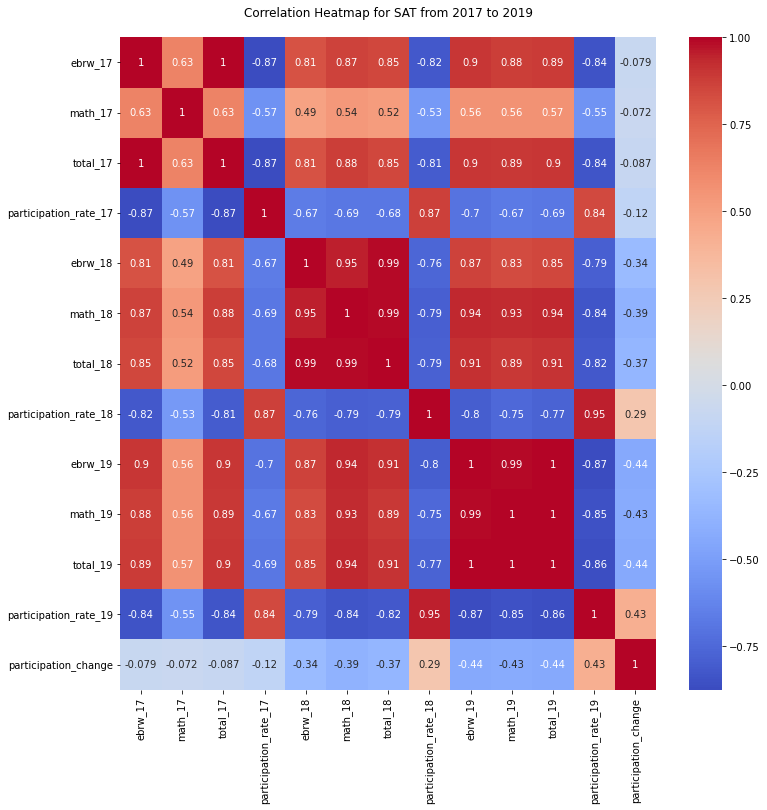

In [50]:
#Plotting a heatmap to visualize correlations between all numeric features

plt.figure(figsize=(12,12))
ax = sns.heatmap(sat_2017_to_sat_2019.corr(), annot=True, cmap = "coolwarm")
ax.set_title('Correlation Heatmap for SAT from 2017 to 2019\n');

As seen from the heatmap, the subject scores of each year are positively correlated to each other as they are ranging from 0.8 to 0.9. While the subject scores of each year are negatively correlated to participation change as they are ranging from -0.08 to -0.4. 

In [51]:
#Defines a function to plot histograms showing comparative distributions of variables in a dataframe
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows,
    fig, ax = plt.subplots(nrows=nrows, ncols=2, sharex=False, sharey=True, squeeze=True, figsize=(20,20)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate,
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists,
            ax[i].hist(dataframe[column]),
            ax[i].set_title(list_of_titles[i])# feel free to add more settings,
            ax[i].set_xlabel(list_of_xlabels[i])# Set titles, labels, etc here for each subplot,
            ax[i].axvline(dataframe[column].median(), color='purple', linestyle='dashed', linewidth=3, label='median'),
            ax[i].axvline(dataframe[column].mean(), color='green', linestyle='dashed', linewidth=3, label = 'mean'),
            ax[i].legend()

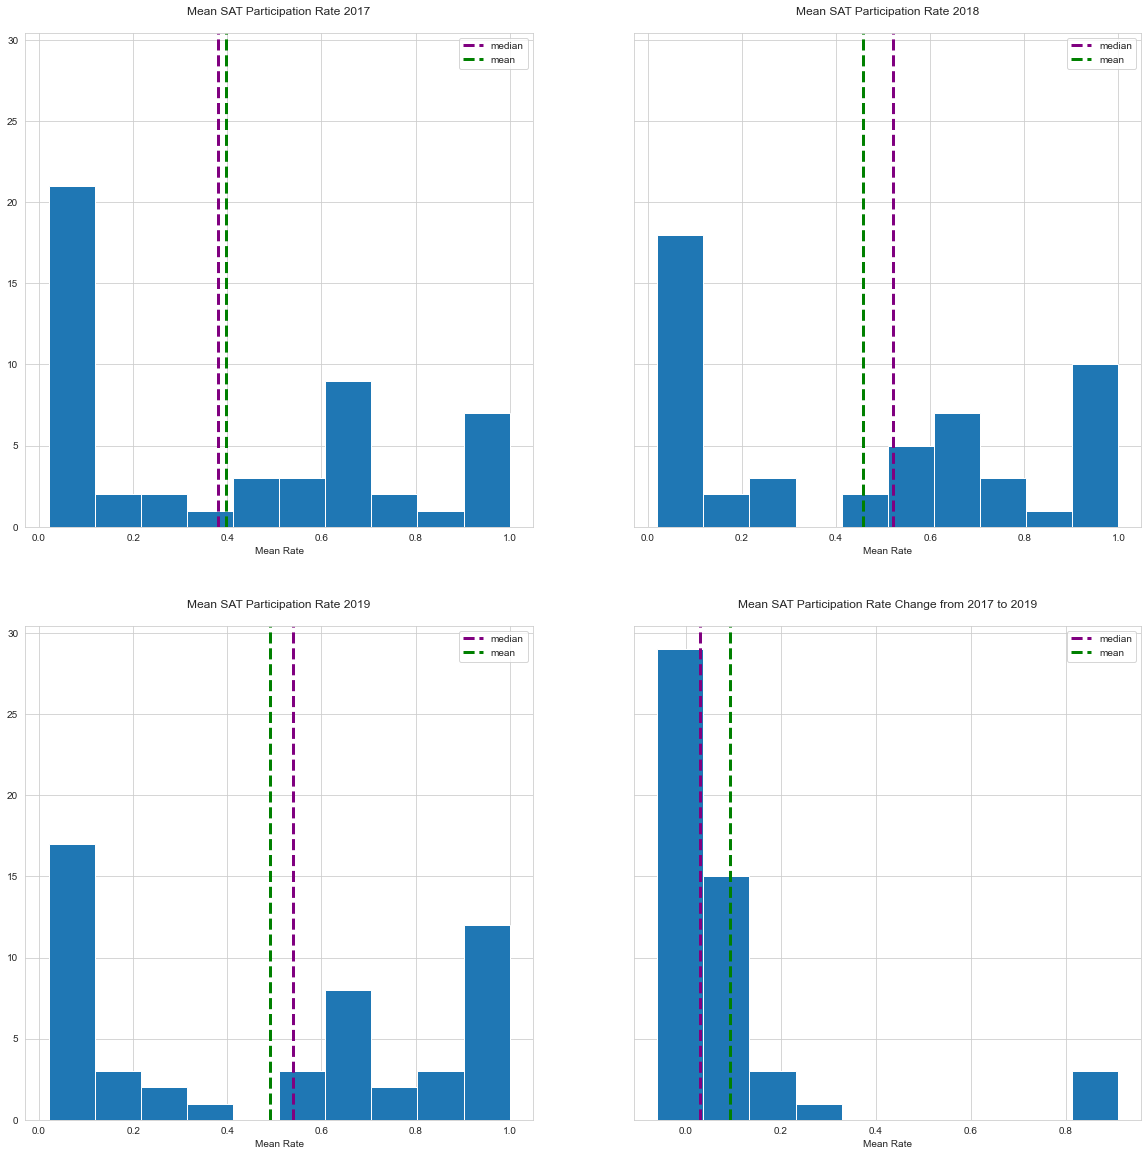

In [64]:
#Histogram for SAT participation rates, 2017, 2018, 2019 and participation rate change from 2017 to 2019.

subplot_histograms(
    sat_2017_to_sat_2019,
    ['participation_rate_17','participation_rate_18','participation_rate_19','participation_change'],
    ['Mean SAT Participation Rate 2017\n', 'Mean SAT Participation Rate 2018\n','Mean SAT Participation Rate 2019\n','Mean SAT Participation Rate Change from 2017 to 2019\n'],
    ['Mean Rate','Mean Rate','Mean Rate','Mean Rate']
)

As seen in above histograms, the mean (green dotted line) for participation rate have been increasing slowly from 40% in 2017 to 50% in 2019. The number of low participation states have also decreased over the years as the number of high participation states increased.

Looking at the 'Mean SAT Participation Rate Change from 2017 to 2019', we can see that even though most states increased only slightly at less than 30%. But there are still a few states that have a participation rate change of more than 80%. 

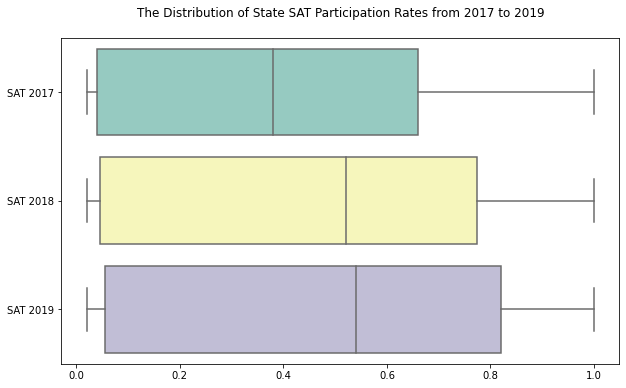

In [56]:
#Boxplot for SAT participation rates, 2017, 2018 and 2019

participation_rates = sat_2017_to_sat_2019.loc[:,['participation_rate_17','participation_rate_18','participation_rate_19']]
participation_rates = participation_rates.rename(columns={
    'participation_rate_17':'SAT 2017',
    'participation_rate_18':'SAT 2018',
    'participation_rate_19':'SAT 2019'
})
plt.figure(figsize=(10,6))
plt.title('The Distribution of State SAT Participation Rates from 2017 to 2019\n')
sns.boxplot(data=participation_rates,orient='h',palette='Set3');

There is a significant increase in median of participation rate from 2017 to 2018.

In [57]:
#Defines a function to create a scatterplot between two variables
def subplot_scatterplot(column1,column2,xlabel,ylabel,title):
    f = plt.figure(figsize=(8,5))
    sns.set_style('whitegrid')
    sns.scatterplot(x=sat_2017_to_sat_2019[column1],y=sat_2017_to_sat_2019[column2])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

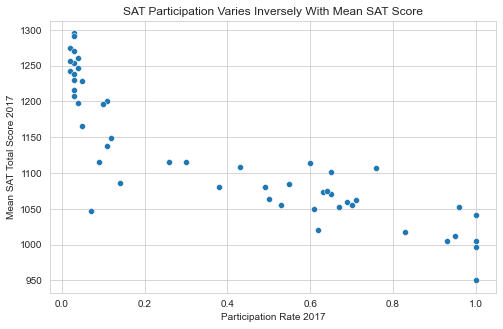

In [58]:
#Scatterplot for SAT participation rates 2017 and the mean SAT total score for 2017

subplot_scatterplot('participation_rate_17','total_17','Participation Rate 2017',
                    'Mean SAT Total Score 2017',
                    'SAT Participation Varies Inversely With Mean SAT Score')

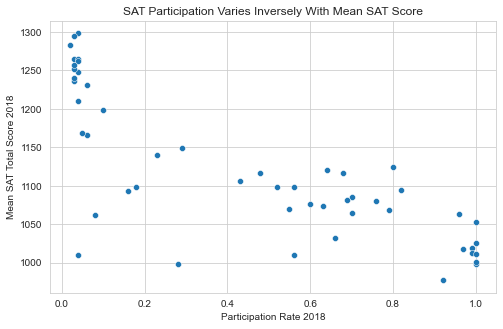

In [59]:
#Scatterplot for SAT participation rates 2018 and the mean SAT total score for 2018

subplot_scatterplot('participation_rate_18','total_18','Participation Rate 2018',
                    'Mean SAT Total Score 2018',
                    'SAT Participation Varies Inversely With Mean SAT Score')

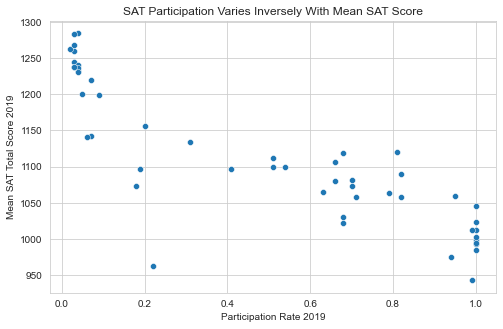

In [60]:
#Scatterplot for SAT participation rates 2019 and the mean SAT total score for 2019

subplot_scatterplot('participation_rate_19','total_19','Participation Rate 2019',
                    'Mean SAT Total Score 2019',
                    'SAT Participation Varies Inversely With Mean SAT Score')

From the above scatterplots, we observed that the participation rate is inversely related to mean total score for 2017, 2018 and 2019.

## Conclusions and Recommendations

There is significant increase in SAT participation rate after the format change in 2016. The changed in format was supported by multiple states as they made it mandatory for students to take the SAT. Some even replaced their stateside exam with SAT so as to reduce students stress from taking multiple exams. 

The following recommendations would help to increase participation rate without making it mandatory for students to take SAT:

1. I would recommend to offer 1 SAT fee waivier for all students who are in the 11th and 12th grade. This would encourage everyone to attempt the SAT at least once (and not just students from low-income families). After trying SAT test once, those who wish to retake to increase their scores would be able to understand the format of the test better. They would then be able to better prepare themselves to take the SAT again (at a cost).

2. I would also recommend the College Board to provide scholarship or study grants for the students who attained high scores on their first try (for example the top 1% of people who took the SAT each year). This would further motivate students to prepare more before attempting to take SAT which would help to increase the mean total score while increasing participation rate.

3. I would also recommend the College Board and other states to further understand South Carolina's school SAT preparation. As in 2018, despite the increase in SAT participation rate, their mean total score increased too. This observation shows that their SAT preparation was able to give students the confidence to take the SAT test. It was also able to help students attain a high score and even beat their peers and seniors who took it the year before. Therefore, other states should implement similar or same SAT preparations especially for low participating states.

**References:**

Ariel Gilreath / Staff. (2018, October 28). SAT scores Jump slightly in SC, surpass national average. GREENVILLE JOURNAL. https://greenvillejournal.com/news/sat-scores-jump-slightly-in-sc-surpass-national-average/

Connecticut to require all 11th graders to take the SAT (Published 2015). (2015, August 7). The New York Times - Breaking News, US News, World News and Videos. https://www.nytimes.com/2015/08/07/nyregion/connecticut-to-require-all-11th-graders-to-take-the-sat.html

Gumbrecht, J. (2014, March 6). Major changes coming to 2016 SAT test. CNN. https://edition.cnn.com/2014/03/05/living/sat-test-changes-schools/

Heimbach, A. (n.d.). Which states require the SAT? Complete list. Online SAT / ACT Prep Blog by PrepScholar. https://blog.prepscholar.com/which-states-require-the-sat

Safier, R. (n.d.). How you get an SAT fee waiver: Complete guide. Online SAT / ACT Prep Blog by PrepScholar. https://blog.prepscholar.com/sat-fee-waiver-complete-guide

SAT prep - Continuing education programs | University of South Carolina. (n.d.). University of South Carolina. https://sc.edu/about/offices_and_divisions/continuing_education/test_preparation/sat_prep/


Using Khan Academy's official SAT practice (article). (n.d.). Khan Academy. https://www.khanacademy.org/test-prep/sat/x0a8c2e5f:about-official-sat-prep-on-khan-academy/x0a8c2e5f:overview-of-official-sat-practice/a/using-khan-academys-official-sat-practice